In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.utils import resample

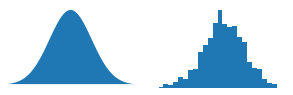

In [2]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = st.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, st.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

### 1. Central Limit Theorem

In [3]:
loans_income = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv", squeeze=True)
loans_income.head(2)

0    67000
1    52000
Name: x, dtype: int64

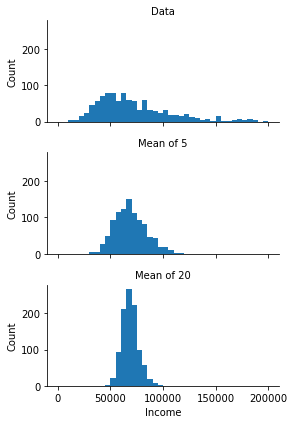

In [4]:

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

In [5]:
results = []
sample_loans_inc = loans_income.sample(20000)

for nrepeat in range(1000):
    sample = resample(sample_loans_inc, replace=True)
    results.append(sample.median())

results = pd.Series(results)
print("Bootstrap Statistics: ")
print(f"Original: {loans_income.median()}")
print(f"Bias: {results.mean() - loans_income.median()}")
print(f"Std. Error: {results.std()}")

Bootstrap Statistics: 
Original: 62000.0
Bias: -204.20900000000256
Std. Error: 404.4826993495183


Origianl Estimate of median is \\$62,000. The bootStrap distribution indicates that the estimate has a bias of about -\\$86 and standard error of \\$231. The results will vary slightly between consecutive runs of this algorithm.

(array([  2.,   3.,   4., 118.,  96.,  59., 680.,   9.,  23.,   6.]),
 array([60000., 60300., 60600., 60900., 61200., 61500., 61800., 62100.,
        62400., 62700., 63000.]),
 <BarContainer object of 10 artists>)

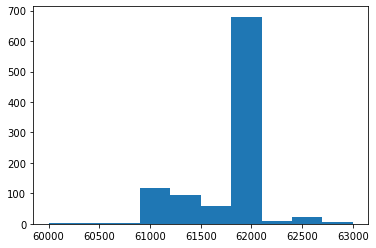

In [6]:
plt.hist(results)

### 2. Standardization vs Normalization

- References:
    1. [About Feature Scaling](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)
    2. [Comparison](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf)

In [8]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head(4)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_sc = StandardScaler()
std_sc.fit(df[['Alcohol', 'Malic acid']])
df_std = std_sc.transform(df[['Alcohol', 'Malic acid']])

nrm_sc = MinMaxScaler()
nrm_sc.fit(df[['Alcohol', 'Malic acid']])
df_nrm = nrm_sc.transform(df[['Alcohol','Malic acid']])

In [21]:
print("Mean after Standardization:\tAlcohol={:.2f}, Malic acid={:.2f}"
     .format(df_std[:, 0].mean(), df_std[:, 1].mean()))
print("Std. Deviation after Standardization:\tAlcohol={:.2f}, Malic acid={:.2f}"
     .format(df_std[:, 0].std(), df_std[:, 1].std()))
print()
print("Min Value Normalization:\tAlcohol={:.2f}, Malic acid={:.2f}"
     .format(df_nrm[:, 0].min(), df_nrm[:, 1].min()))
print("Max Value after Normalization:\tAlcohol={:.2f}, Malic acid={:.2f}"
     .format(df_nrm[:, 0].max(), df_nrm[:, 1].max()))

Mean after Standardization:	Alcohol=-0.00, Malic acid=-0.00
Std. Deviation after Standardization:	Alcohol=1.00, Malic acid=1.00

Min Value Normalization:	Alcohol=0.00, Malic acid=0.00
Max Value after Normalization:	Alcohol=1.00, Malic acid=1.00


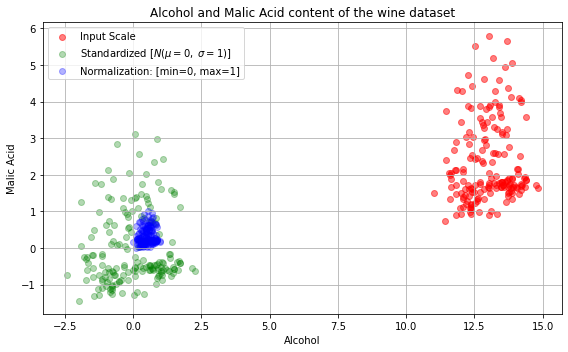

In [33]:
#plotting before and after results
plt.figure(figsize=(8,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color = "red", alpha=0.5, label="Input Scale")

plt.scatter(df_std[:,0], df_std[:,1], color = "green", alpha=0.3, 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]')

plt.scatter(df_nrm[:,0] , df_nrm[:,1], color = "blue", alpha=0.3, 
           label="Normalization: [min=0, max=1]")

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc="upper left")
plt.tight_layout()
plt.grid()
plt.show()


#### a. Standard Normal and QQ Plot

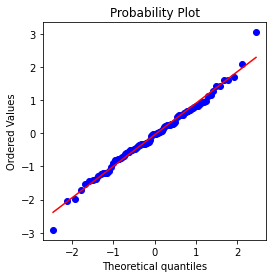

In [3]:
#QQ Plot
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = st.norm.rvs(size=100)
st.probplot(norm_sample, plot=ax)
plt.show()

#### b. Skewed/Long Tailed Distribution

In [4]:
sp500_px = pd.read_csv("https://github.com/gedeck/practical-statistics-for-data-scientists/raw/master/data/sp500_data.csv.gz", compression="gzip")
sp500_px.head(2)

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.125,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.125,0.0


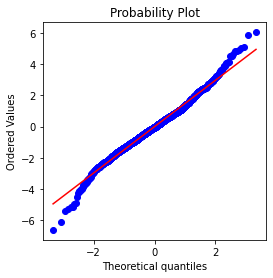

In [5]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig,ax = plt.subplots(figsize=(4,4))
st.probplot(nflx, plot=ax)
plt.show()

### 3. Binomial Distribution

In [8]:
st.binom.pmf(2, n=5, p=0.1), st.binom.cdf(2, n=5, p=0.1)

(0.0729, 0.99144)

- <b>PMF</b>: Probability of observing exactly <b>2 successes</b> outcomes in <b>n=5 trials</b>
</b>, where for each trial probability of success is <b>p=0.1</b>
- <b>CDF</b>: Probability of observing <b>2 or fewer successes</b> outcomes in <b>n=5 trials</b>
</b>, where for each trial probability of success is <b>p=0.1</b>  

> <b>Problem:</b> Studies show that color blindness affects more than 8% of the men. A random sample of 10 men is taken. Find,
> 1. Probablity that all 10 men are blind  
> 2. Probablity that no men are blind  
> 3. Probability that 2 men are blind  
> 4. Probability that atleast 2 men are blind  
> 5. Expected no. of color blind men in the sample.
> 6. Std. Dev. of no. of color blind men in the sample.

In [26]:
#p=0.08, n=10
n_samples, p_blind = 10, 0.08
print("P(blind = 10) = ",st.binom.pmf(10, n=n_samples, p=p_blind)) 
print("P(blind = 0) = ",st.binom.pmf(0, n=n_samples, p=p_blind)) 
print("P(blind = 2) = ",st.binom.pmf(2, n=n_samples, p=p_blind)) 
print("P(blind >= 2) = 1 - P(blind <= 1) = ",1- st.binom.cdf(1, n=n_samples, p=p_blind)) 
print("P(blind >= 2) = 1 - P(blind = 1) - P(blind =0 ) = ",
      1- st.binom.pmf(1, n=n_samples, p=p_blind) - st.binom.pmf(0, n=n_samples, p=p_blind))
print("E(x) = n*p = ", n_samples * p_blind)
print("SD(x) = SqRoot(n*p(1-p)) = ", np.sqrt(n_samples * p_blind * (1 - p_blind)))

P(blind = 10) =  1.0737418239999982e-11
P(blind = 0) =  0.43438845422363215
P(blind = 2) =  0.14780703546361768
P(blind >= 2) = 1 - P(blind <= 1) =  0.18788245514712232
P(blind >= 2) = 1 - P(blind = 1) - P(blind =0 ) =  0.1878824551471222
E(x) = n*p =  0.8
SD(x) = SqRoot(n*p(1-p)) =  0.8579044235810888


(0.10483725588365922, 0.7576078383294875, 0.09020401043104986)